Predict which customers are likely to churn and help the business take proactive retention actions.

In [41]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [42]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [43]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Data Cleaning

In [44]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

In [45]:
df.drop('customerID', axis=1, inplace=True)

Exploratory Data Analysis

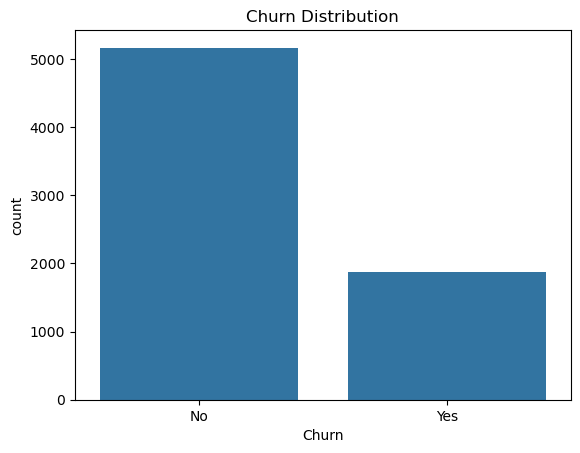

In [46]:
#Churn distribution
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()
#Most customers are retained, but churned customers form a significant minority worth targeting.

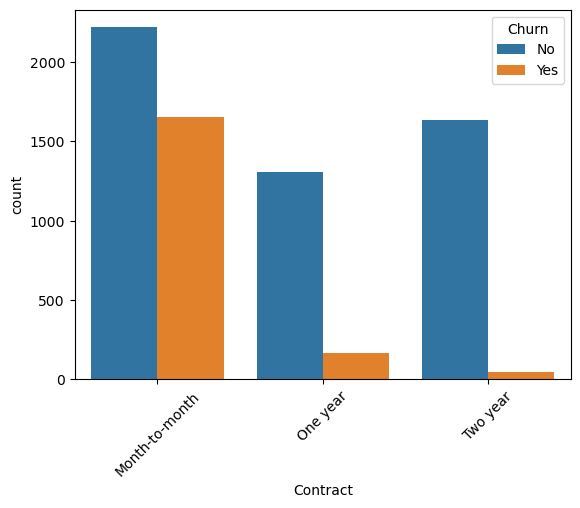

In [47]:
#Churn vs Contract
sns.countplot(x='Contract', hue='Churn', data=df)
plt.xticks(rotation=45)
plt.show()
#Month-to-month contracts show the highest churn rate compared to long-term contracts.

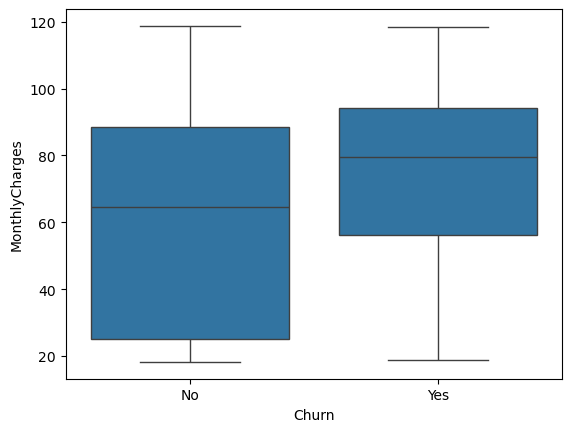

In [48]:
#Customers with higher monthly charges tend to churn more frequently.
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.show()

In [49]:
le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [50]:
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0,12,24,48,60,72],
    labels=[0,1,2,3,4]
)

In [51]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [52]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:,1]))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.77      0.79      0.78      1407

ROC-AUC: 0.8308907651769675


In [54]:
#RandomForest
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
print("Random Forest ROC-AUC:", rf_auc)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.45      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407

Random Forest ROC-AUC: 0.8159661646934581


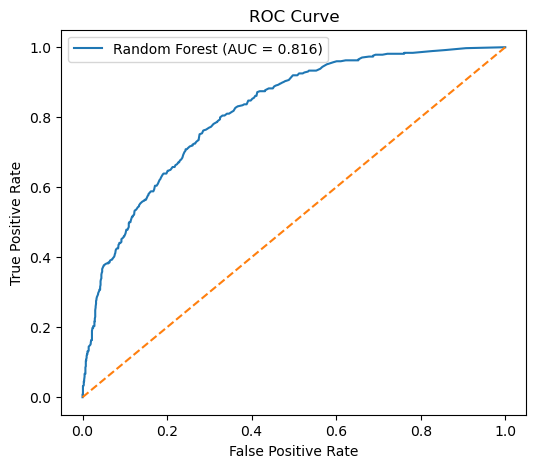

In [55]:
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {rf_auc:.3f})")
plt.plot([0,1], [0,1], linestyle='--')
plt.legend()
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

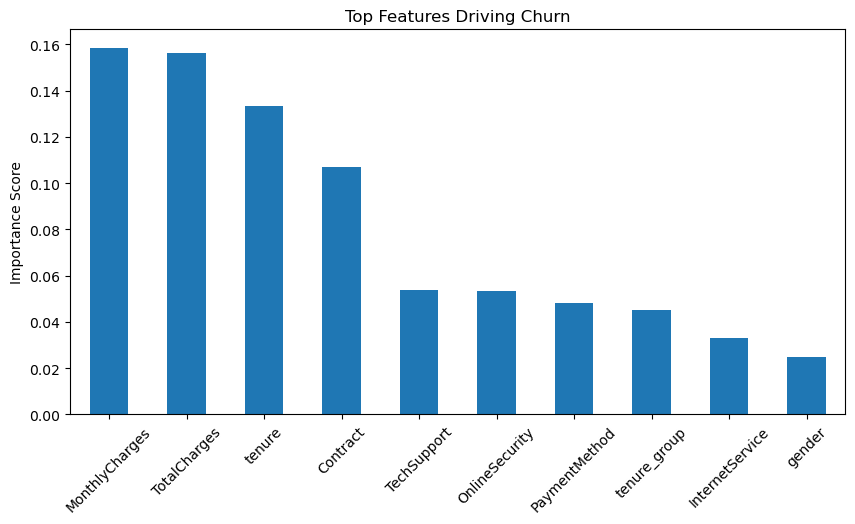

In [56]:
importance = pd.Series(rf.feature_importances_, index=X.columns)

plt.figure(figsize=(10,5))
importance.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top Features Driving Churn")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.show()

1)Month-to-month customers show highest churn risk

2)Higher monthly charges increase churn probability

3)Low-tenure customers require early engagement

In [57]:
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:,1])
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "ROC-AUC": [lr_auc, rf_auc]
})

results

,Model,ROC-AUC
0,Logistic Regression,0.830891
1,Random Forest,0.815966


Done
